# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import msoffcrypto
import io

# Loading data

In [ ]:
temp = io.BytesIO()
with open('/Users/arkadiuszdrag/Documents/Nauka/Studia semestr 6/Machine Learning AGH/Zajęcia 5/Lab6_data.xlsx', 'rb') as f:
    excel = msoffcrypto.OfficeFile(f)
    excel.load_key('Pr$d_6_dat012')
    excel.decrypt(temp)

In [ ]:
df = pd.read_excel(temp)
df.head(20)

DEPT [MD]  VP [m/s]  VSX [m/s]  VSY [m/s]            PAR1          PAR2  \
0      1050.0      3055       1531       1573  49766683317413  1.490218e-07   
1      1050.1      3034       1517       1552  51917976630989  1.447758e-07   
2      1050.2      3025       1510       1539  52937501416995  1.421186e-07   
3      1050.3      3016       1504       1526  53973542181495  1.395260e-07   
4      1050.4      3030       1498       1523  54823457877834  1.388839e-07   
5      1050.5      3058       1493       1522  55684315391959  1.386300e-07   
6      1050.6      3085       1493       1521  55684315391959  1.383765e-07   
7      1050.7      3113       1493       1526  55684315391959  1.394453e-07   
8      1050.8      3133       1506       1534  53589918434209  1.409694e-07   
9      1050.9      3147       1524       1551  50782540549249  1.444163e-07   
10     1051.0      3143       1530       1550  49984370138916  1.443893e-07   
11     1051.1      3134       1535       1555  49196498540544  1.454007e-07   
12     1051.2      3114       1541       1555  48418819170012  1.452260e-07   
13     1051.3      3081       1546       1552  47651226272641  1.446197e-07   
14     1051.4      3039       1541       1543  48418819170012  1.429572e-07   
15     1051.5      3000       1532       1534  49589153669233  1.409727e-07   
16     1051.6      2977       1524       1516  50782540549249  1.374327e-07   
17     1051.7      2952       1516       1501  51999341642857  1.344485e-07   
18     1051.8      2938       1498       1492  54931663831466  1.327918e-07   
19     1051.9      2937       1481       1480  57678953794184  1.304712e-07   

    PAR3          PAR4          PAR5  
0     88  8.917627e+12  1.629024e+10  
1     98 -4.181219e+13  1.711206e+10  
2    101 -2.550837e+13  1.750000e+10  
3    105 -5.251573e+13  1.789574e+10  
4    106 -6.034015e+14  1.809355e+10  
5     96 -1.640276e+14  1.820939e+10  
6    106 -4.052963e+13  1.805002e+10  
7    106  4.263216e+13  1.788767e+10  
8     90 -7.115511e+13  1.710499e+10  
9     86 -7.323396e+13  1.613681e+10  
10    89  2.641913e+14  1.590339e+10  
11    90  1.702310e+14  1.569767e+10  
12   102 -6.203143e+13  1.554875e+10  
13    96 -7.562792e+13  1.546616e+10  
14    92  8.005894e+13  1.593248e+10  
15   113  4.939281e+12  1.652972e+10  
16    91  1.609579e+13  1.705829e+10  
17   102  1.133980e+14  1.761495e+10  
18    91 -7.107454e+12  1.869696e+10  
19   114 -4.893530e+13  1.963873e+10

In [ ]:
df.isnull().sum()

DEPT [MD]    0
VP [m/s]     0
VSX [m/s]    0
VSY [m/s]    0
PAR1         0
PAR2         0
PAR3         0
PAR4         0
PAR5         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5501 entries, 0 to 5500
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPT [MD]  5501 non-null   float64
 1   VP [m/s]   5501 non-null   int64  
 2   VSX [m/s]  5501 non-null   int64  
 3   VSY [m/s]  5501 non-null   int64  
 4   PAR1       5501 non-null   int64  
 5   PAR2       5501 non-null   float64
 6   PAR3       5501 non-null   int64  
 7   PAR4       5501 non-null   float64
 8   PAR5       5501 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 386.9 KB


# Corelation map

<AxesSubplot:>

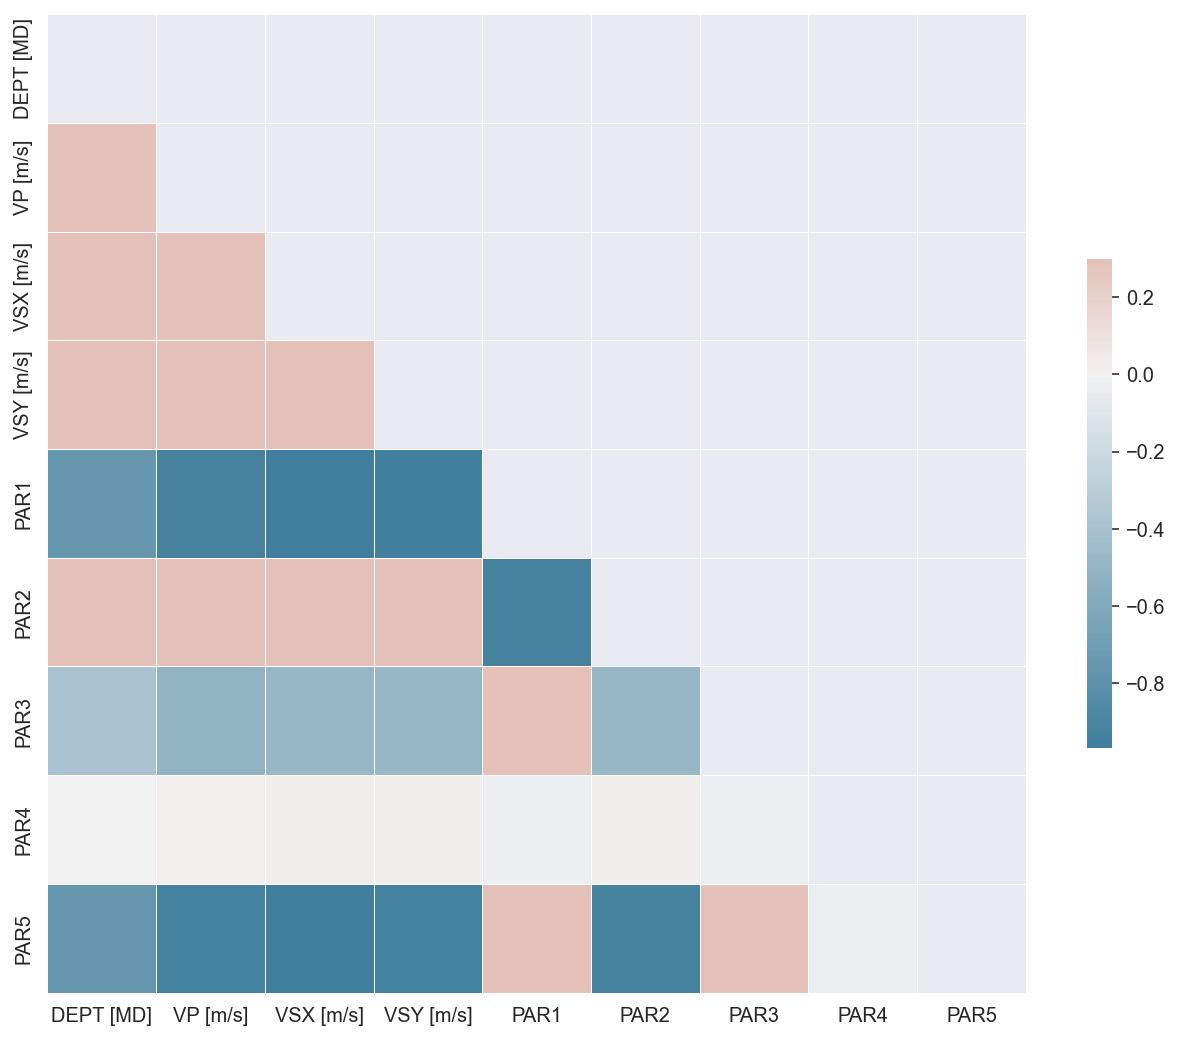

In [ ]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Feature distributions

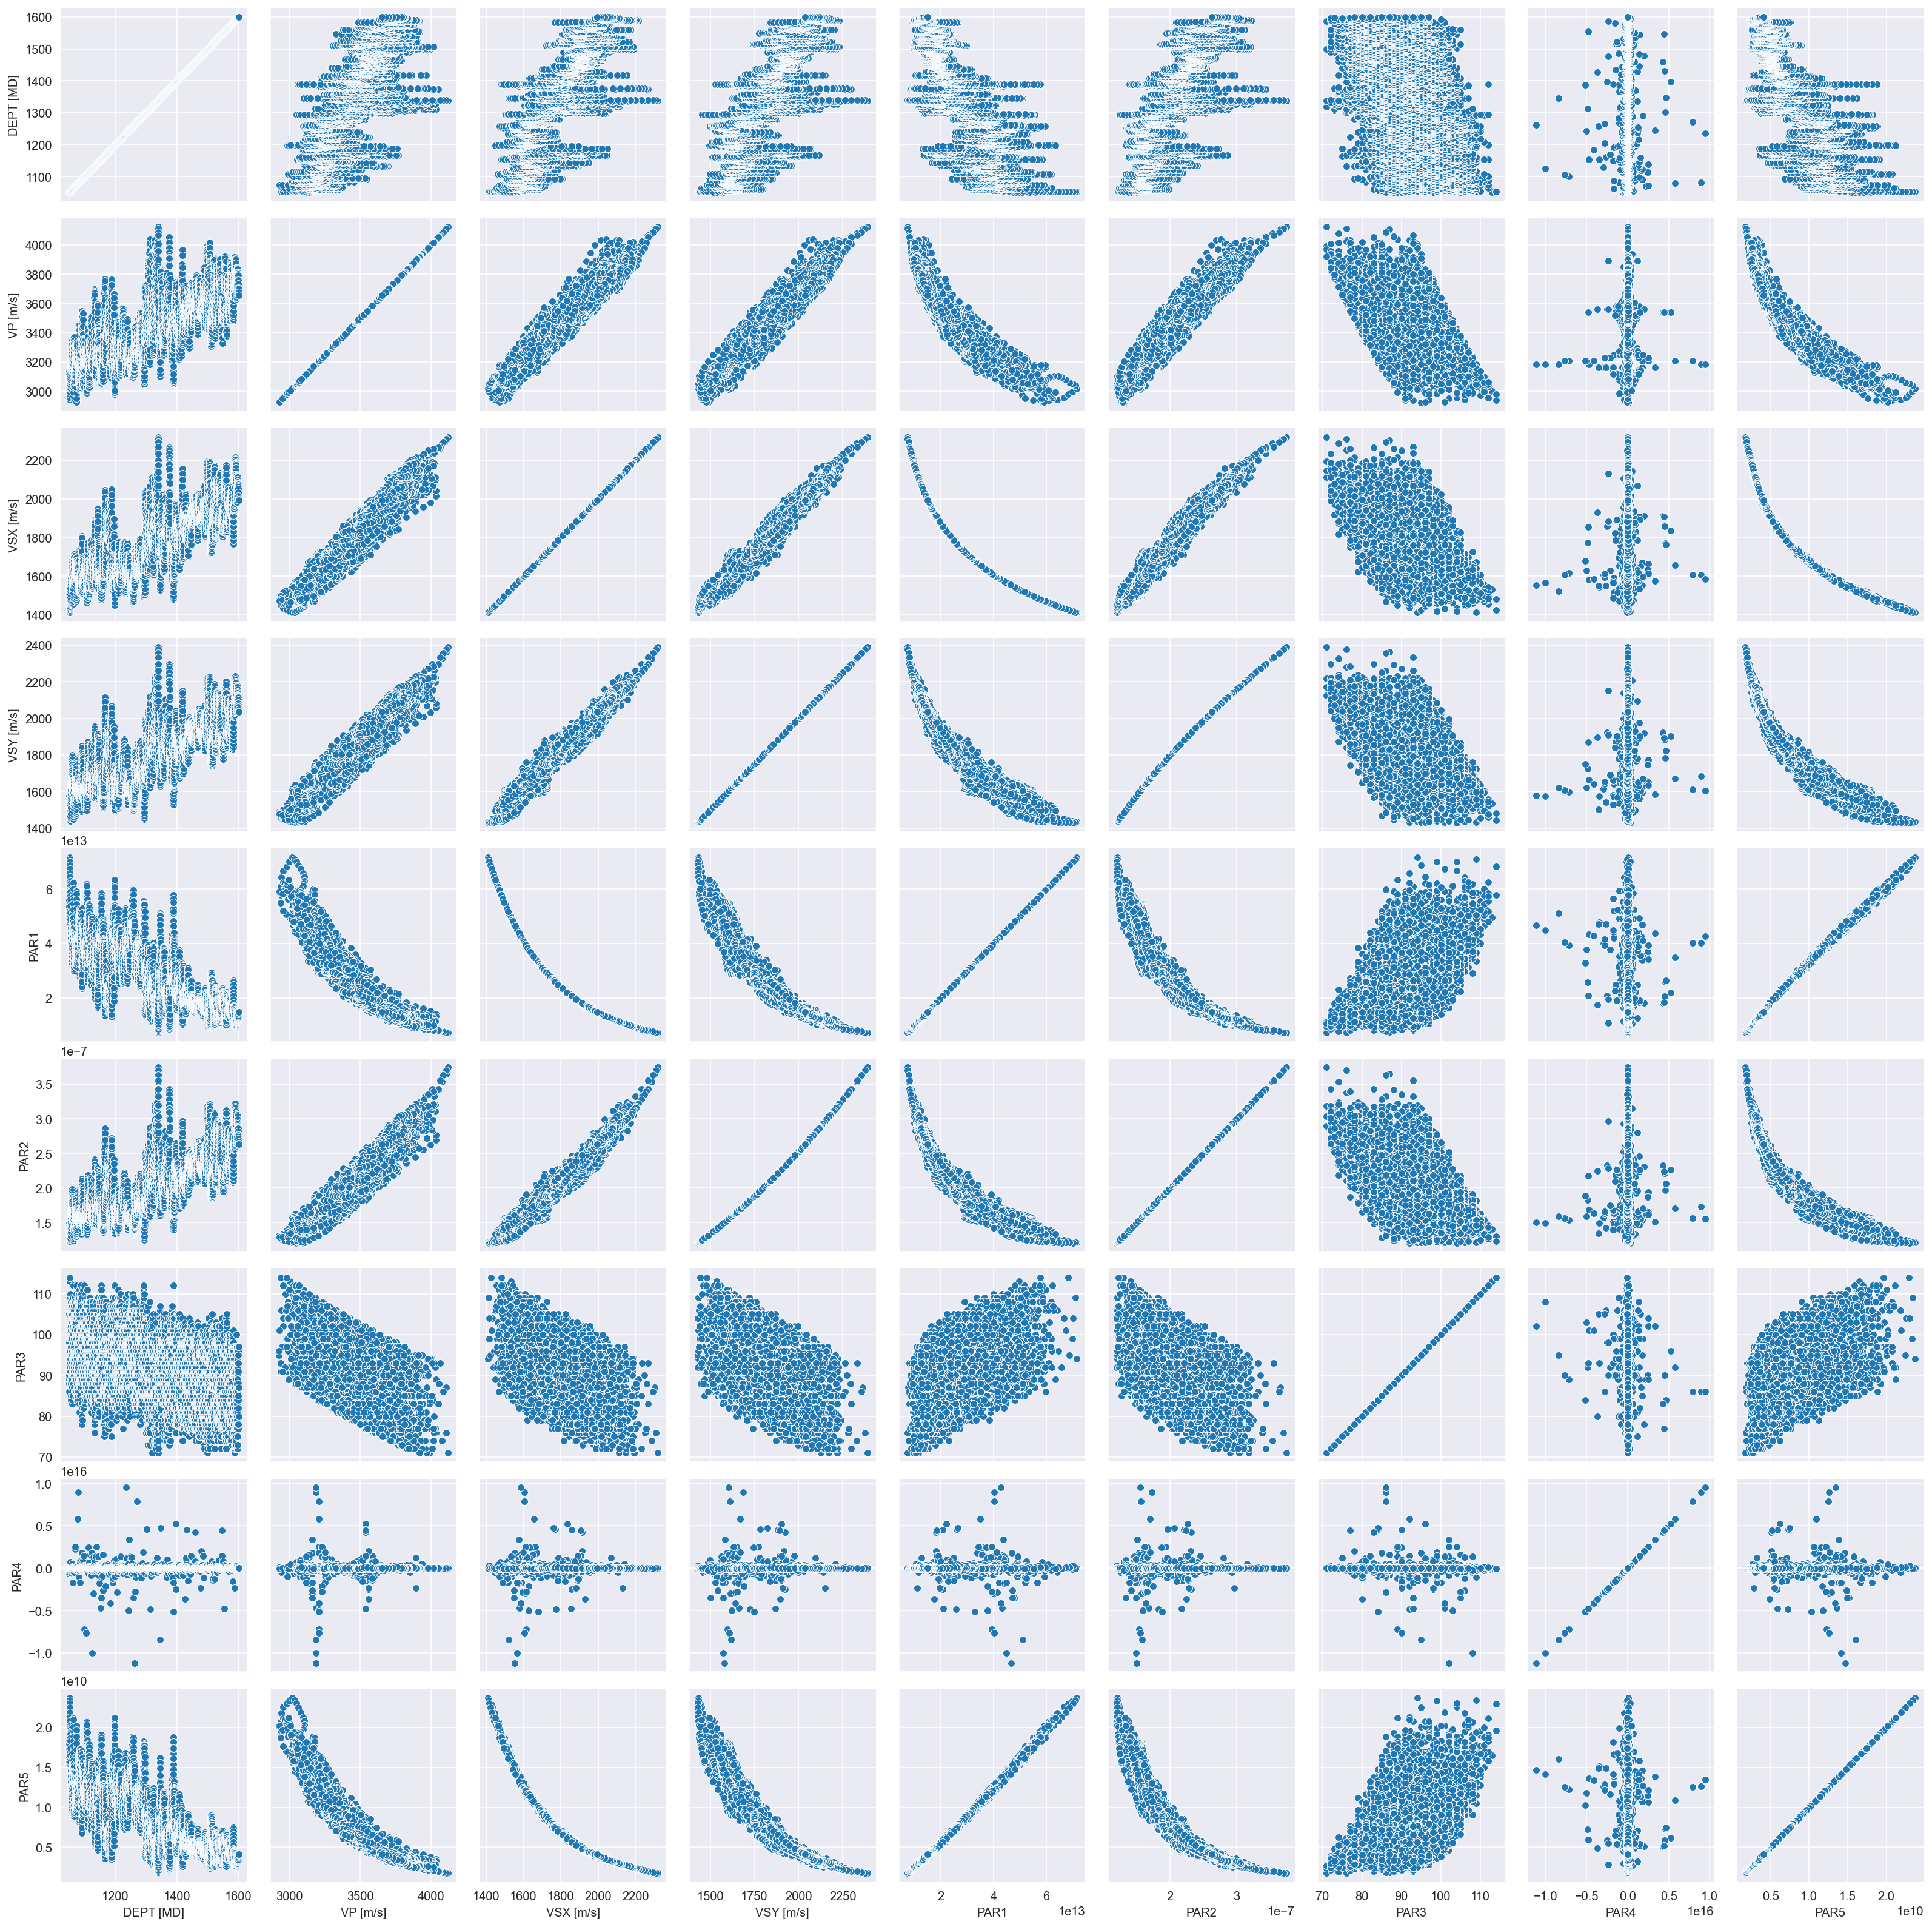

In [ ]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

# Log transformation of PAR1 and PAR5

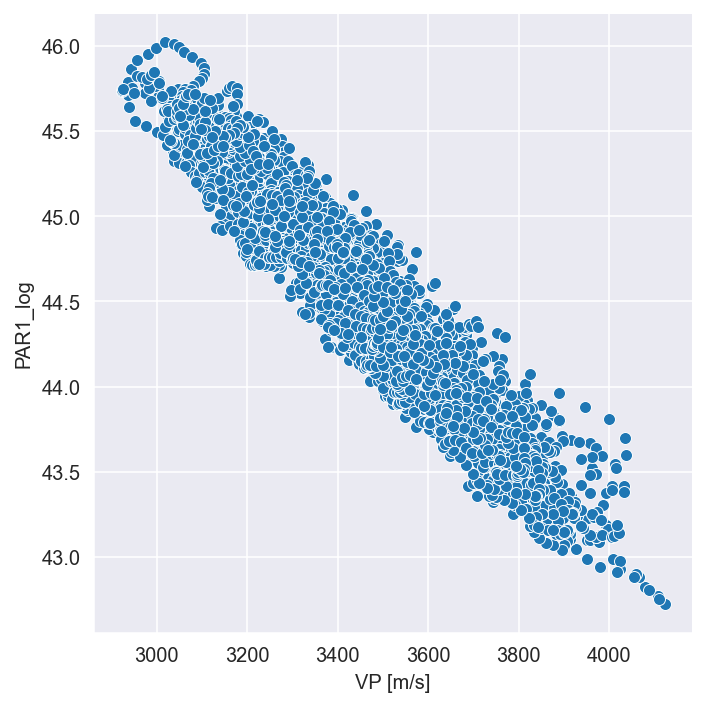

In [ ]:
df['PAR1_log'] = np.log2(df['PAR1'])
sns.relplot(x="VP [m/s]", y="PAR1_log", data=df)

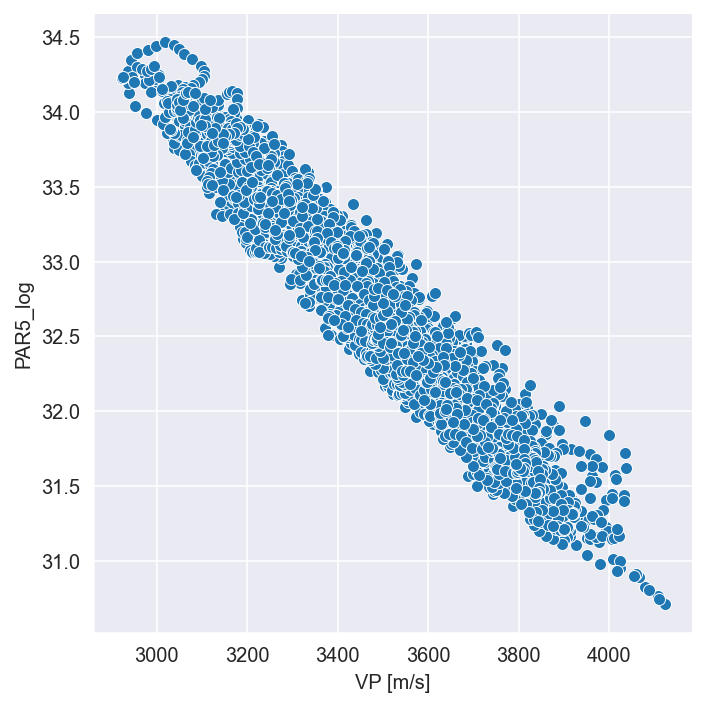

In [ ]:
df['PAR5_log'] = np.log2(df['PAR5'])
sns.relplot(x="VP [m/s]", y="PAR5_log", data=df)

In [ ]:
from sklearn.model_selection import train_test_split


X = df[['PAR1_log','PAR2', 'PAR3', 'PAR5_log', 'DEPT [MD]']].values
y = df['VP [m/s]'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Simple linear regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regr = LinearRegression()

regr.fit(X_train[:,np.newaxis, 1], y_train)

y_pred = regr.predict(X_test[:,np.newaxis, 1])

print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Coefficient of determination: 0.91
Mean squared error: 4457.94


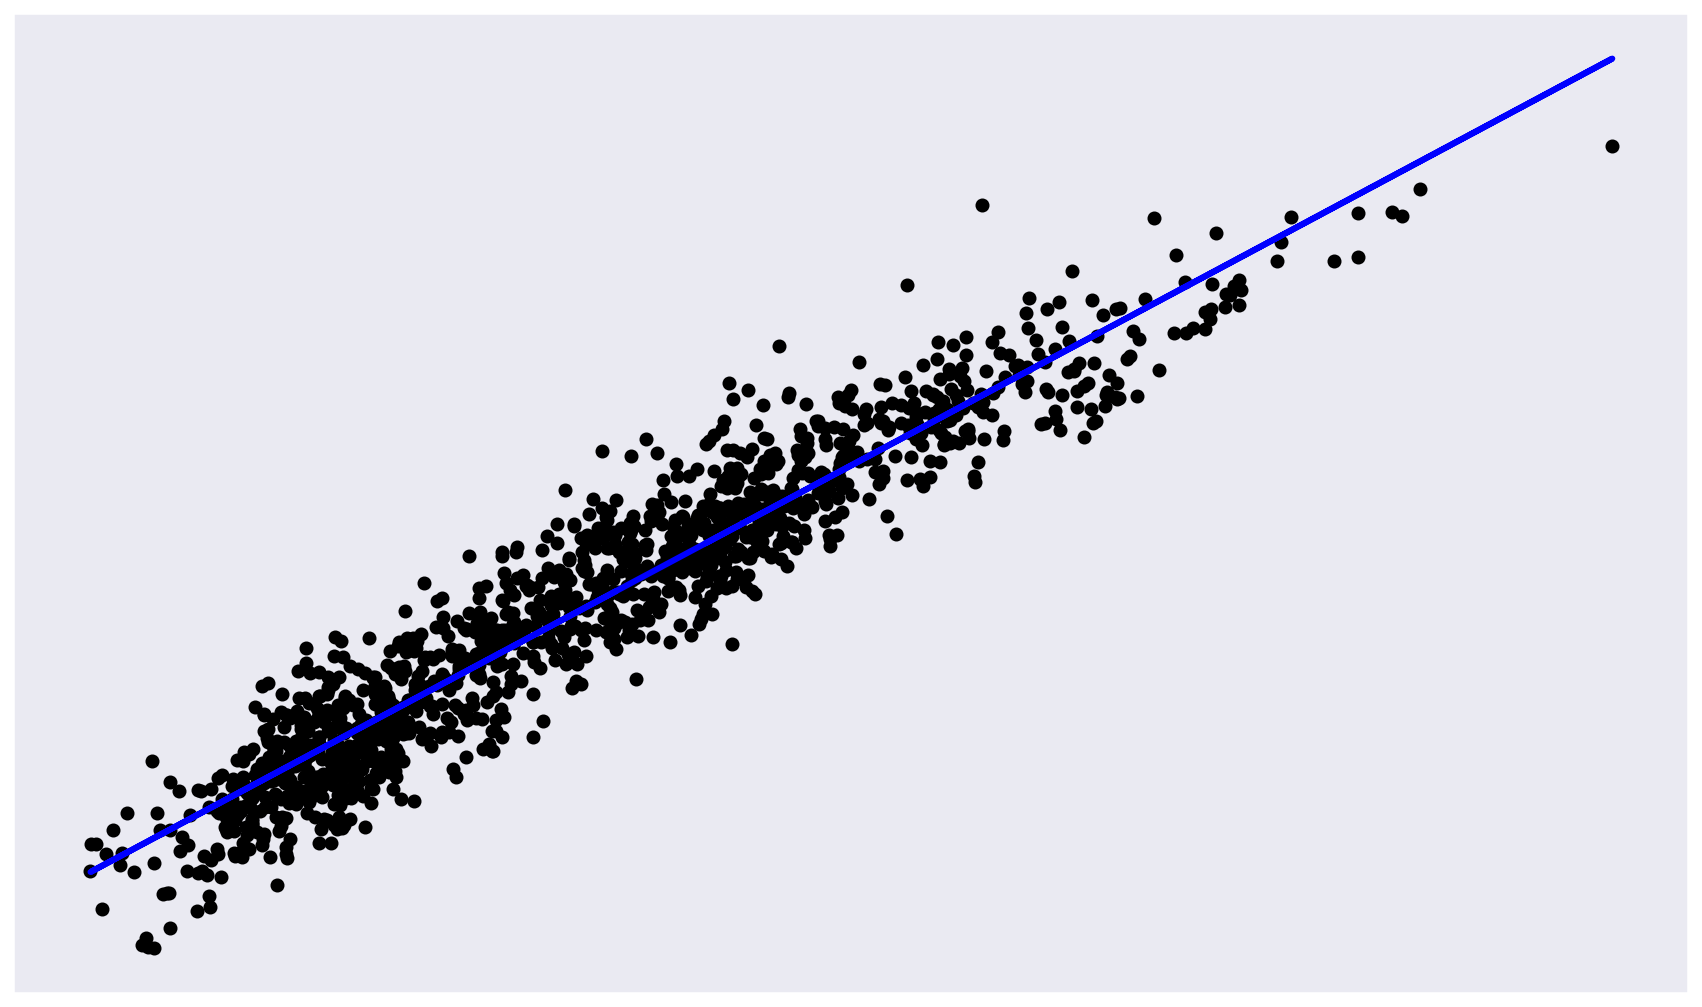

In [ ]:
plt.scatter(X_test[:,np.newaxis, 1], y_test, color="black")
plt.plot(X_test[:,np.newaxis, 1], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Expectation (mean) of residuals is zero

In [ ]:
residual = (y_test - y_pred)

residual.mean()

1.6991952259840744

We can't assume that the expectation of residuals is 0.

Jarque-Bera test ---- statistic: 15.0551, p-value: 0.0005380431361975413
Shapiro-Wilk test ---- statistic: 0.9959, p-value: 0.0009
Kolmogorov-Smirnov test ---- statistic: 0.4837, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.6175, 5% critical value: 0.7850


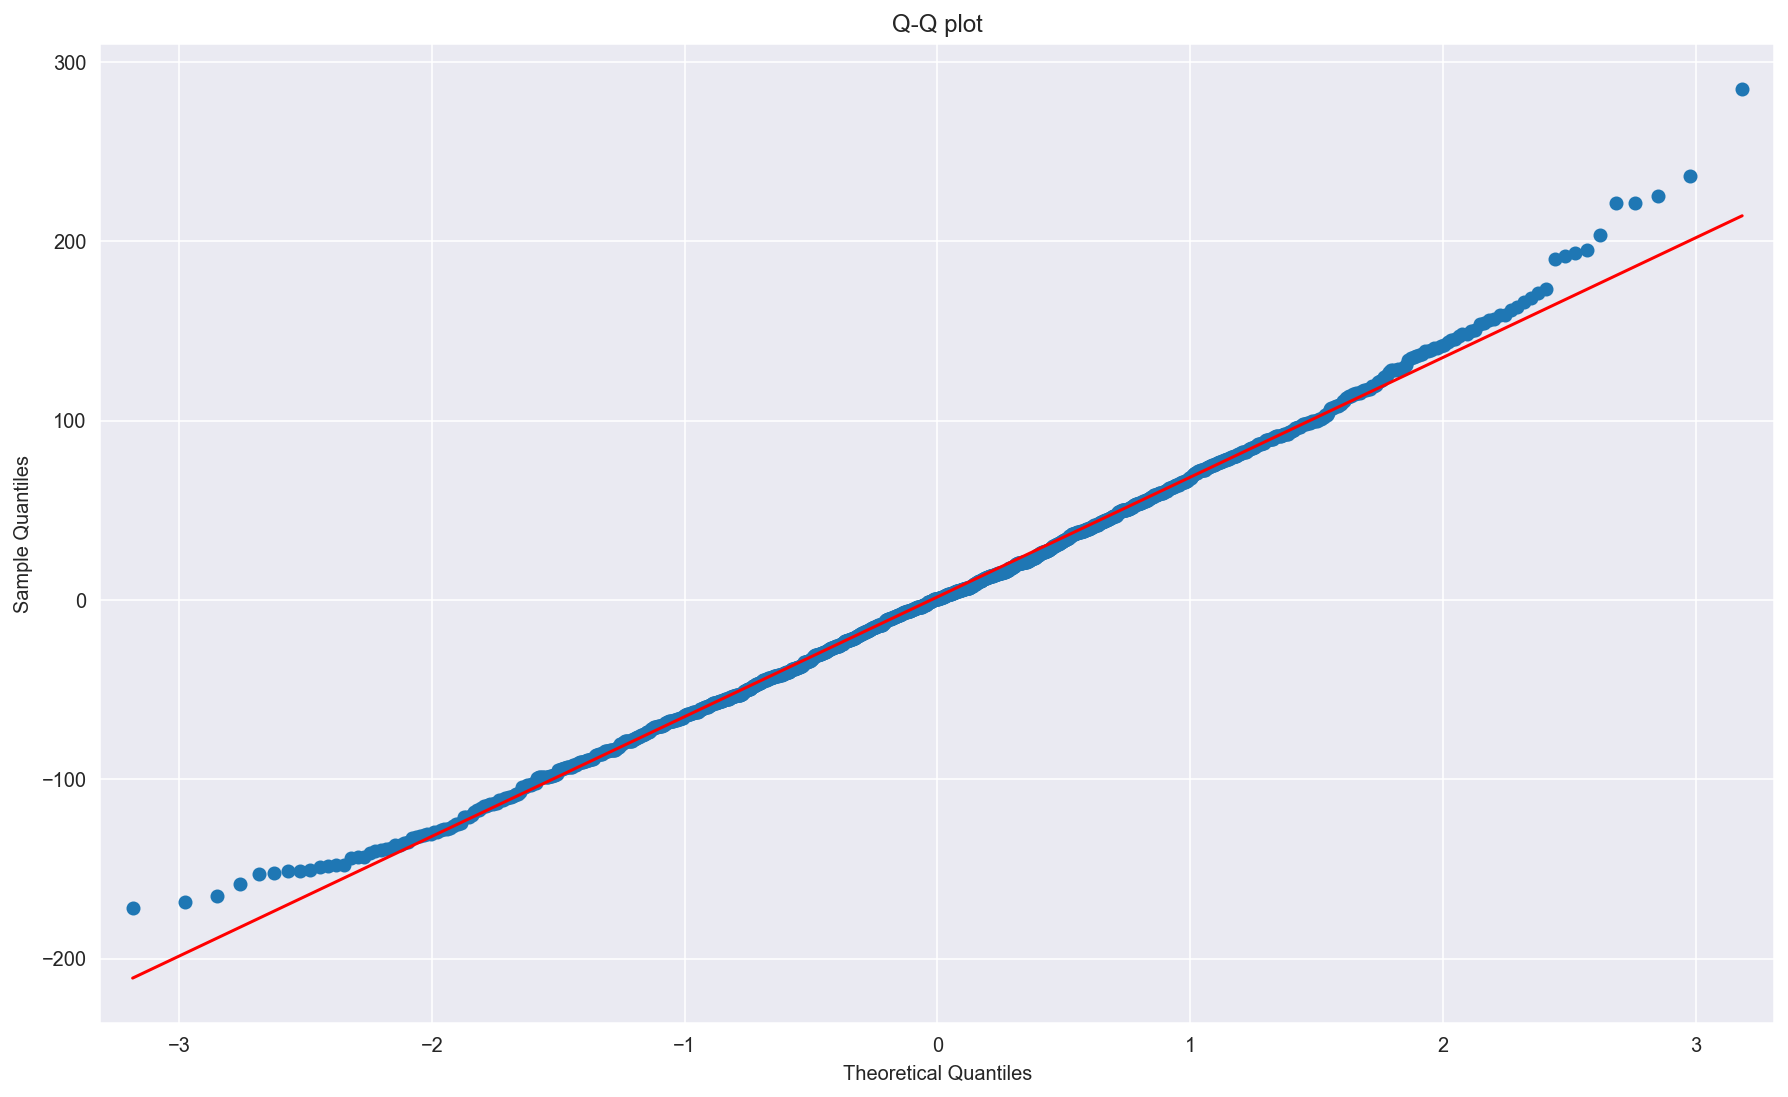

In [ ]:
from scipy import stats
from statsmodels.graphics.gofplots import ProbPlot

def normality_of_residuals_test(model, residuals):

    ProbPlot(residuals).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(residuals)
    sw = stats.shapiro(residuals)
    ad = stats.anderson(residuals, dist='norm')
    ks = stats.kstest(residuals, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    
  
normality_of_residuals_test(regr, residual)

From the results above we can infer that the residuals do not follow Gaussian distribution — from the shape of the QQ plot, as well as rejecting the null hypothesis in all statistical tests. 

## Homoscedasticity of residuals

Text(0, 0.5, 'Residuals')

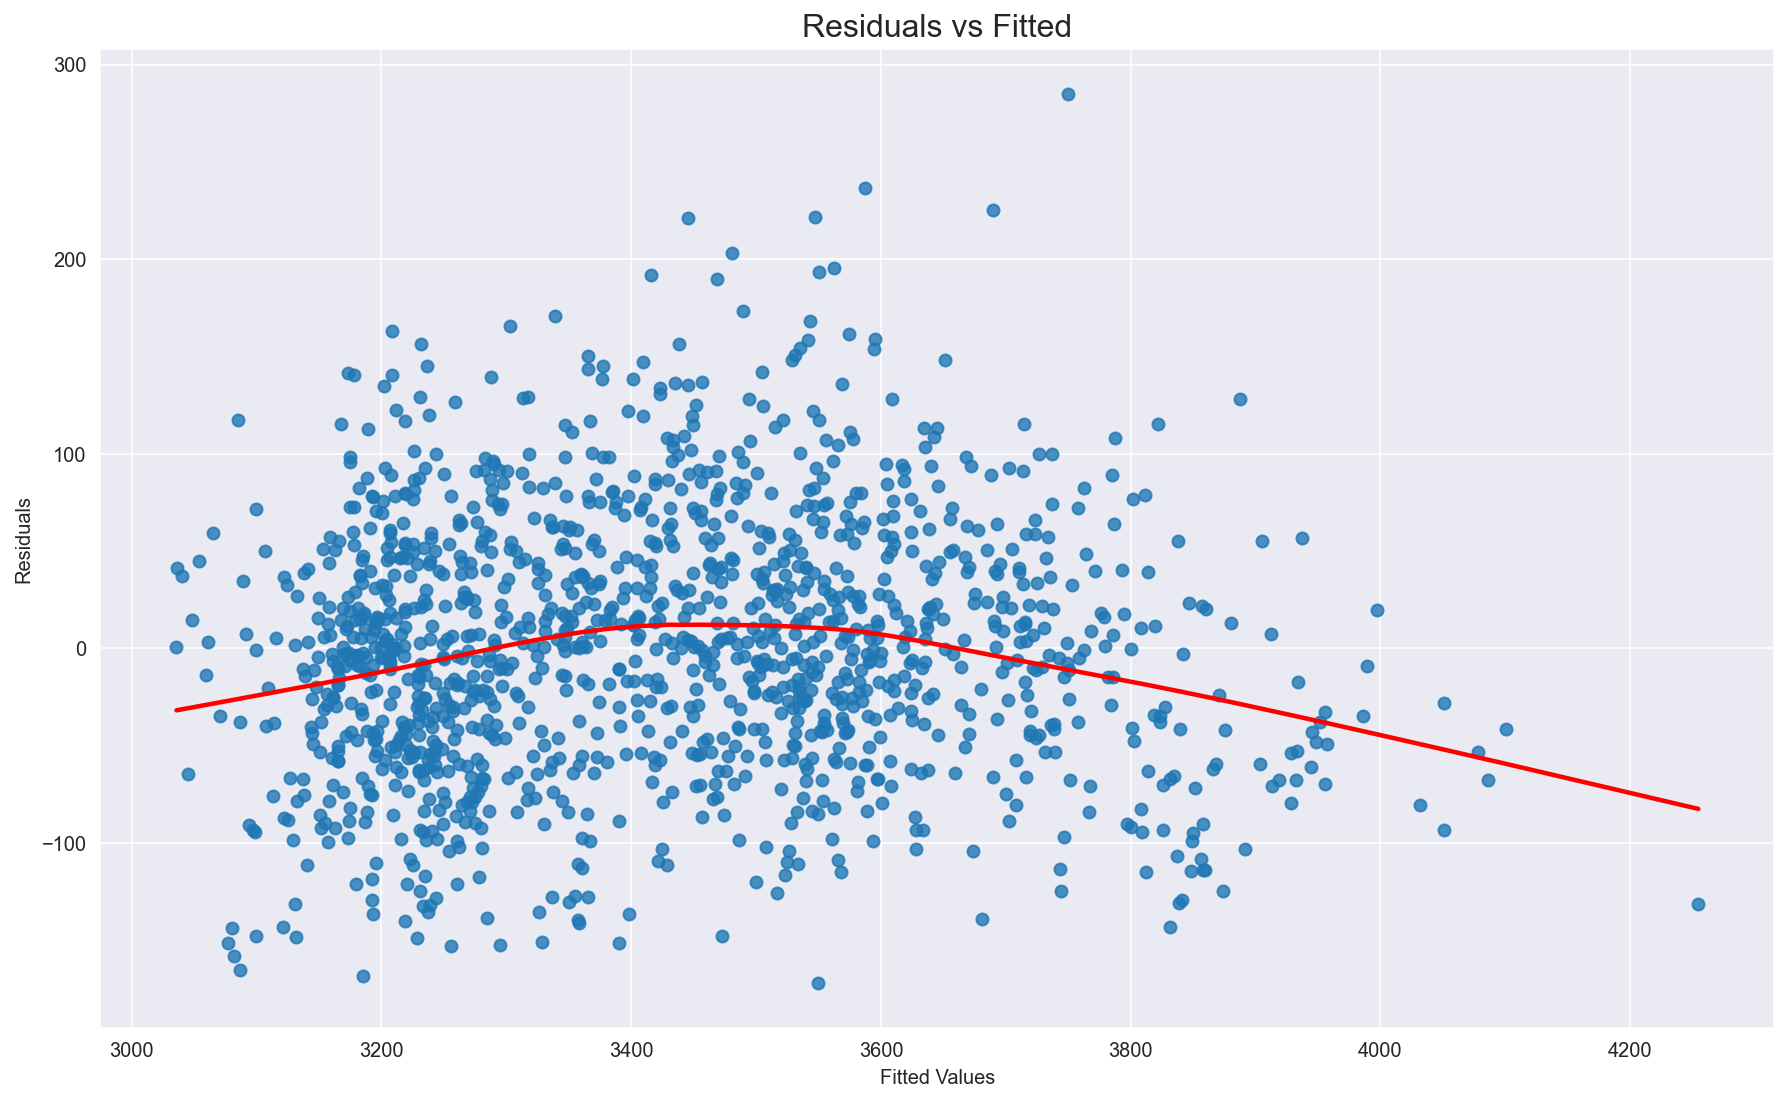

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

#fig, ax = plt.subplots(1,2)

sns.regplot(x=y_pred, y=residual, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted', fontsize=16)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

The results indicate that the assumption is not satisfied and we should reject the hypothesis of homoscedasticity. So our model does not meet the assumptions of linear regression.

# Multi-linear regression

To build multi-linear model we take

In [ ]:
df[['PAR2', 'PAR3']]

PAR2  PAR3
0     1.490218e-07    88
1     1.447758e-07    98
2     1.421186e-07   101
3     1.395260e-07   105
4     1.388839e-07   106
...            ...   ...
5496  2.733877e-07    91
5497  2.707722e-07    78
5498  2.671700e-07    97
5499  2.641442e-07    80
5500  2.629131e-07    87

[5501 rows x 2 columns]

We see that magnitudes of PAR2 and PAR3 are very different

In [ ]:
#check for ranges of features

print("Min of PAR2: {}".format( X_train[:, [1,2]].reshape(-1,2)[:,0].min()) )
print("Max of PAR2: {}".format( X_train[:, [1,2]].reshape(-1,2)[:,0].max()) )

print("Min of PAR3: %.2f" % X_train[:, [1,2]].reshape(-1,2)[:,1].min() )
print("Max of PAR3: %.2f" % X_train[:, [1,2]].reshape(-1,2)[:,1].max() )

Min of PAR2: 1.208362399570789e-07
Max of PAR3: 3.699220117545056e-07
Min of PAR2: 71.00
Max of PAR3: 112.00


## Visualisation

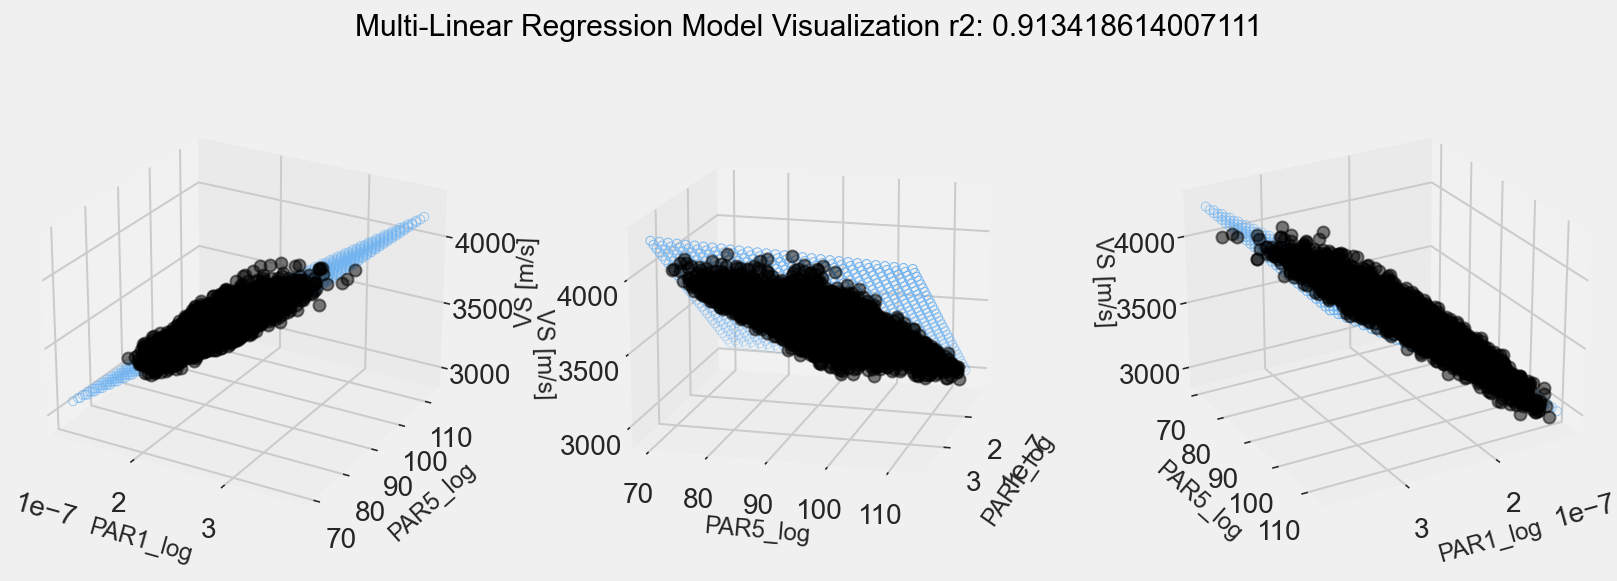

In [ ]:
# Prepare data
X = X_train[:, [1,2]].reshape(-1,2)
Y = y_train

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = y_train

xx_pred = np.linspace(1.208362399570789e-07, 3.699220117545056e-07, 30)  # range of PAR2
yy_pred = np.linspace(70, 113, 30)  # range of PAR3
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model built on previous step
ols = LinearRegression()
regr2 = ols.fit(X, Y)
predicted = regr2.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = regr2.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('PAR1_log', fontsize=12)
    ax.set_ylabel('PAR5_log', fontsize=12)
    ax.set_zlabel('VS [m/s]', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization r2: {}'.format( r2 ), fontsize=15, color='k')

fig.tight_layout()



# Summary

We see our multi-linear regression model has much better MSE and R2 score and this model use only 2 features to predict VS. We should our multi-linear regression instead simple linear regression model.